# Mini-task-chem-3

## 1. Загрузка и первичный анализ

- Загрузите подготовленный датасет.
- Посмотрите на распределение `pValue`, проверьте на выбросы и артефакты.

(4139, 341)


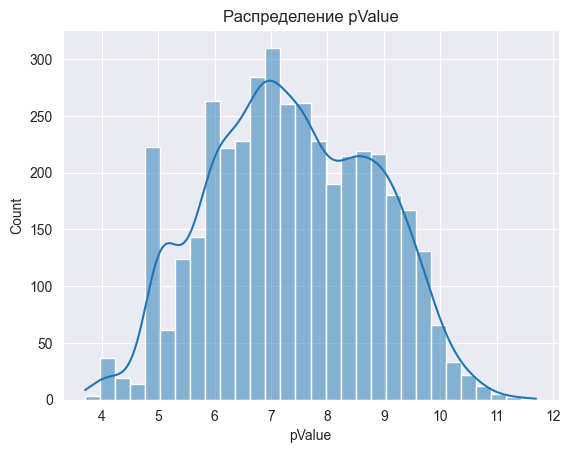

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("..\\Mini-Task-2\\final_dataset_mini_task_2.csv")  
print(df.shape)
df.describe()

sns.histplot(df["pValue"], kde=True, bins=30)
plt.title("Распределение pValue")
plt.show()

## 2. Разделение выборки

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# X = df.drop(columns=["pValue"])
X = df.drop(columns=["pValue", "molecule_chembl_id", "smiles"])

y = df["pValue"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 3. Построение базовых моделей

- Выберите несколько базовых моделей регрессии:
  - `LinearRegression`
  - `RandomForestRegressor`
  - `XGBRegressor`, `LGBMRegressor`, `CatBoostRegressor`
  - `KNeighborsRegressor`
  - `Ridge`, `Lasso`
- Обучите и сравните их с помощью **кросс-валидации (R², MAE, MAPE)**.

Посмотрим с чем работаем:

In [13]:
X.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,...,pca_329,pca_330,pca_331,pca_332,pca_333,pca_334,pca_335,pca_336,pca_337,pca_338
0,-1.609616,8.234091,2.940706,2.583355,1.546085,-1.396697,1.434167,-2.884229,-2.752355,-1.262775,...,-0.736954,-1.161829,-0.706288,0.118720,-0.124668,0.333873,0.871606,0.844265,-0.635906,-0.458644
1,-1.609616,8.234091,2.940706,2.583355,1.546085,-1.396697,1.434167,-2.884229,-2.752355,-1.262775,...,-0.736954,-1.161829,-0.706288,0.118720,-0.124668,0.333873,0.871606,0.844265,-0.635906,-0.458644
2,-1.280553,9.510941,3.628570,2.399689,0.767259,-1.809777,2.330975,-2.810254,-3.857926,-1.774149,...,-0.181232,-0.026129,0.194038,-0.066814,0.121559,-0.129269,0.075400,-0.073290,0.016178,0.060936
3,-1.525144,8.122060,3.363503,2.317466,1.217481,-1.215100,2.204470,-2.963792,-2.528882,-1.360629,...,-0.474611,0.686109,-0.536986,0.427256,-0.306097,-0.509537,-1.246874,0.046200,0.287897,-0.421012
4,-1.422023,7.419929,3.968279,1.449245,1.417217,-0.607714,1.427493,-2.968161,-1.482348,-1.272039,...,1.192889,0.075919,-1.239811,1.068463,0.065388,0.040411,-0.477352,-0.043882,0.286260,-0.431488


In [14]:
y.head()

0    8.602060
1    8.124939
2    8.508638
3    8.408935
4    8.130768
Name: pValue, dtype: float64

Подключаем библиотеки:

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_absolute_percentage_error
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

Выбираем модели:

In [ ]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "XGB": xgb.XGBRegressor(),
    "LGBM": lgb.LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}

Запускаем обучение, считаем крос валидацию:

In [15]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    print(f"{name}: mean R² = {scores.mean():.4f}")


Linear: mean R² = 0.5526
Ridge: mean R² = 0.5527
Lasso: mean R² = 0.1455
RandomForest: mean R² = 0.5860
KNN: mean R² = 0.5625
XGB: mean R² = 0.5471
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86188
[LightGBM] [Info] Number of data points in the train set: 2648, number of used features: 338
[LightGBM] [Info] Start training from score 7.391587
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86188
[LightGBM] [Info] Number of data points in the train set: 2649, number of used features: 338
[LightGBM] [Info] Start training from score 7.378444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Lig

Получается лучшая модель - Lasso

## 4. Выбор лучшей модели и тюнинг

- Выберите **наилучшую модель** по результатам кросс-валидации.
- Проведите **подбор гиперпараметров** с помощью `Optuna` или `GridSearchCV`.

In [16]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    model = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    return score.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Лучшие параметры:", study.best_params)


C:\Users\shiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-07-13 18:50:14,293] A new study created in memory with name: no-name-4bbf4a97-b9c4-4cb1-9aa7-5ad1f0147296
[I 2025-07-13 18:51:17,448] Trial 0 finished with value: 0.5251351410217767 and parameters: {'n_estimators': 715, 'max_depth': 15}. Best is trial 0 with value: 0.5251351410217767.
[I 2025-07-13 18:51:47,153] Trial 1 finished with value: 0.5312132212693885 and parameters: {'n_estimators': 207, 'max_depth': 9}. Best is trial 1 with value: 0.5312132212693885.
[I 2025-07-13 18:52:46,743] Trial 2 finished with value: 0.5278053410169439 and parameters: {'n_estimators': 625, 'max_depth': 14}. Best is trial 1 with value: 0.5312132212693885.
[I 2025-07-13 18:53:34,892] Trial 3 finished with value: 0.5323778835

Лучшие параметры: {'n_estimators': 345, 'max_depth': 4}


Посмотрели лучшие параметры для модели `xgb.XGBRegressor`

In [17]:
def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-5, 1.0, log=True)
    model = Lasso(alpha=alpha, max_iter=10000)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    return score.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Лучшие параметры:", study.best_params)


[I 2025-07-13 19:50:28,495] A new study created in memory with name: no-name-72ded0cf-772a-4b97-a811-4447c3db876f
[I 2025-07-13 19:50:29,568] Trial 0 finished with value: 0.5526903247869612 and parameters: {'alpha': 1.5317158540380442e-05}. Best is trial 0 with value: 0.5526903247869612.
[I 2025-07-13 19:50:29,813] Trial 1 finished with value: 0.5535306437424797 and parameters: {'alpha': 0.00017024470540467158}. Best is trial 1 with value: 0.5535306437424797.
[I 2025-07-13 19:50:29,949] Trial 2 finished with value: 0.45677656529959726 and parameters: {'alpha': 0.11344836026585137}. Best is trial 1 with value: 0.5535306437424797.
[I 2025-07-13 19:50:30,106] Trial 3 finished with value: 0.5691297407022489 and parameters: {'alpha': 0.0061422614576407885}. Best is trial 3 with value: 0.5691297407022489.
[I 2025-07-13 19:50:30,253] Trial 4 finished with value: 0.5598094969143648 and parameters: {'alpha': 0.01847008069094774}. Best is trial 3 with value: 0.5691297407022489.
[I 2025-07-13 19:

Лучшие параметры: {'alpha': 0.008270065064993108}


Посмотрели лучшие параметры для `Lasso`

## 5. Финальная оценка

- Проведите финальное обучение на всей train-выборке.
- Оцените модель:
  - через **кросс-валидацию**
  - и отдельно (единожды и только в самом конце) на **hold-out test-сете** (для подтверждения обобщающей способности).

Для Lasso:

In [18]:
best_model = Lasso(**study.best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))


R²: 0.5925476119943578
MAE: 0.7183830836631968
MAPE: 0.10219880594184617


Для xgb:

In [19]:
best_model = xgb.XGBRegressor(n_estimators=345, max_depth=4)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

R²: 0.570569864734856
MAE: 0.7287263085250703
MAPE: 0.1022816605707668


## 6. Дополнительно

- Постройте **кривую обучения** (learning curve).
- Выведите **ТОП-важные признаки** по итогам модели.
- Обучите модель на **ТОП-важных признаков**.
- Оцените метрики модели, обученной на урезанном количестве признаков.

Кривая обучения для xgb:

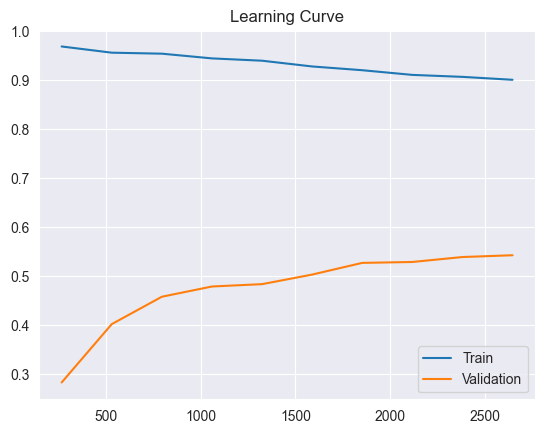

In [20]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, val_scores_mean, label="Validation")
plt.legend()
plt.title("Learning Curve")
plt.show()

Для Lasso:

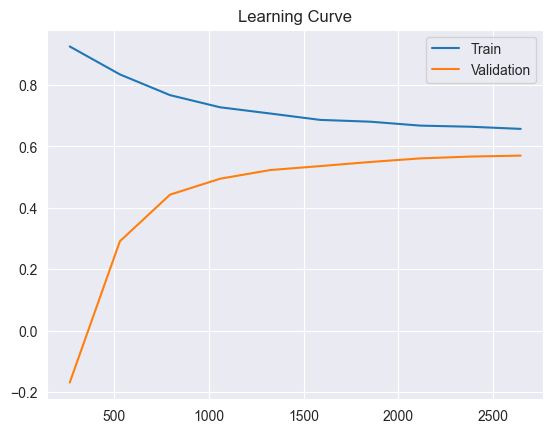

In [21]:
train_sizes, train_scores, val_scores = learning_curve(
    Lasso(alpha=0.008270065064993108), X_train, y_train, cv=5, scoring="r2", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, val_scores_mean, label="Validation")
plt.legend()
plt.title("Learning Curve")
plt.show()

Топ 20 важных признаков по мнению xgb:

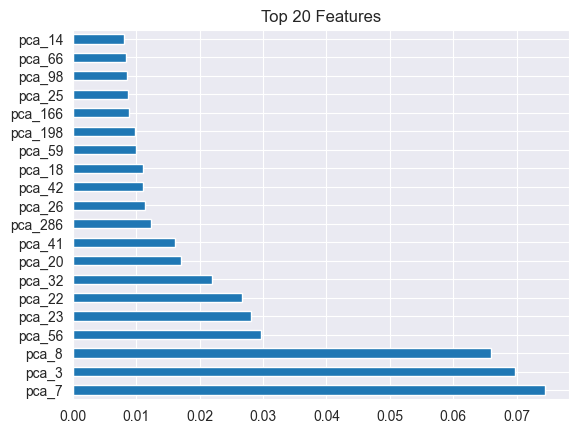

In [22]:
importances = best_model.feature_importances_
top_features = pd.Series(importances, index=X.columns).nlargest(20)
top_features.plot(kind='barh')
plt.title("Top 20 Features")
plt.show()

Модель xgb обучена на 20 признаках:

In [24]:
importances = best_model.feature_importances_
feature_series = pd.Series(importances, index=X.columns)

top_n = 20
top_features = feature_series.nlargest(top_n).index.tolist()

X_train_top = X_train[top_features] # берем только топ 20
X_test_top = X_test[top_features] # берем только топ 20

model_top = xgb.XGBRegressor(n_estimators=345, max_depth=4)
model_top.fit(X_train_top, y_train)

y_pred_top = model_top.predict(X_test_top)

print("Модель на топ 20 признаках:")
print("R²:", r2_score(y_test, y_pred_top))
print("MAE:", mean_absolute_error(y_test, y_pred_top))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_top))


Модель на топ 20 признаках:
R²: 0.561469372013347
MAE: 0.7448041508523009
MAPE: 0.10447067547069888
